### PCA versus t-SNE

Principal component analysis (PCA) and t-distributed stochastic neighbor embedding (t-SNE) are two of the most common unsupervised learning algorithms for dimensional reduction. The former is linear while hte latter is nonlinear. As such, they both have different roles to play and transmute different elements of some initial dataset into a lower-dimensional embedding. We will unpack this statement in detail below through an example of 3d $\to$ 2d dimensional reduction.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import time

import torch.nn
import torch.nn.functional
import torch.optim
import torch.utils.data

from sklearn.datasets import make_swiss_roll

First, let us define our dataset as a PyTorch object. PyTorch does not natively have any datasets with intrinsic geometric structure, so we will use one from scikit-learn instead.

In [123]:
# Initialize a 3d dataset X
N = 5000
X, _ = make_swiss_roll(n_samples = N, noise=0.1)
X = torch.tensor(X, dtype=torch.float32)

# Target dimension
d = 2

## Principal Component Analysis

We start by performing PCA. First, let us define a function for implementing it.

In [124]:
def PCA(input_data, dim):
    X_centered = input_data - torch.mean(X, axis = 0)

    cov_mat = (1/N) * torch.matmul(X_centered.t(), X_centered)
    eigvals, eigvecs = torch.linalg.eig(cov_mat)

    eigvals = torch.real(eigvals)
    eigvecs = torch.real(eigvecs)

    eigvecs_chosen = eigvecs[0:dim]

    return torch.matmul(X_centered, eigvecs_chosen.t())

Now, let us use this function to dimensionally reduce the data set from 3d to 2d.

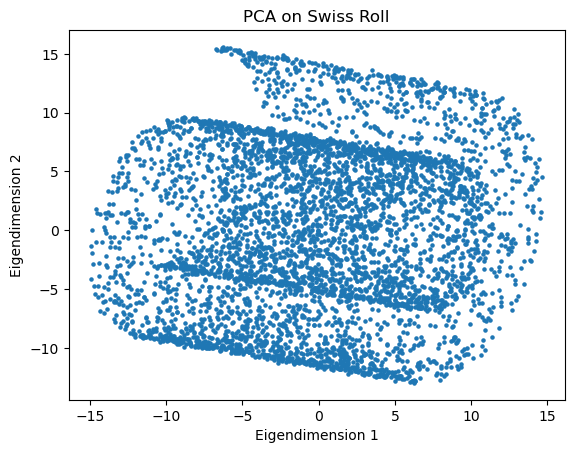

In [133]:
y = PCA(X, d)

plt.scatter(y[:,0],y[:,1], s = 5)
plt.xlabel("Eigendimension 1")
plt.ylabel("Eigendimension 2")
plt.title("PCA on Swiss Roll")
plt.show()

We stress that PCA has not truly preserved geometric information. In particular, points that are on opposite sides of the swiss roll in the 3d embedding are now very close to each other in the 2d projection! Put more simply, PCA fails to "unwrap" the roll.

## t-Distributed Stochastic Neighbor Embedding

Next, we implement t-SNE. This time, we use the scikit-learn function

In [127]:
from sklearn.manifold import TSNE

# Run t-SNE
tsne = TSNE(n_components = d,
            perplexity = 30,   # neighborhood size
            learning_rate = 200,
            max_iter = 1000,
            random_state = 42)

X_embedded = tsne.fit_transform(X) 

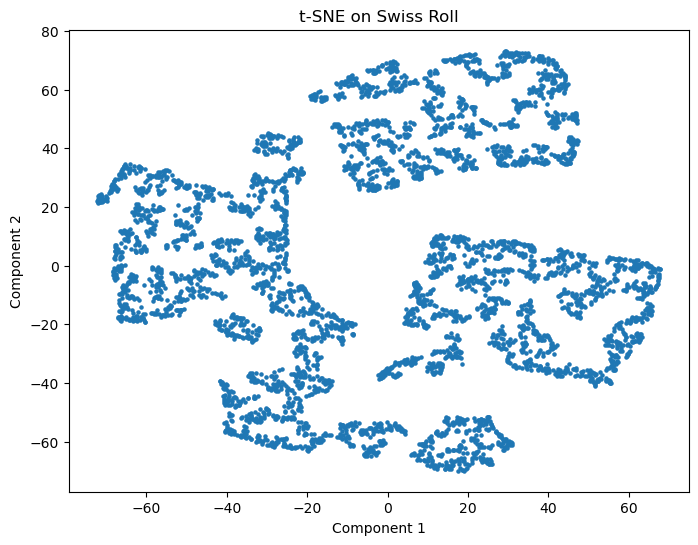

In [132]:
# Plot the result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s=5)
plt.title("t-SNE on Swiss Roll")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

This indeed looks like an unwrapped swiss roll. The distances between different points in the original dataset were preserved.